# Measuring the Josephson Current, the gap voltage and the normal state resistance at 757ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/757_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,-7.866,-60.8799,0.00308
1,-7.527,-58.5666,0.00296
2,-7.146,-55.6790,0.00282
3,-6.821,-53.0376,0.00269
4,-6.496,-50.2946,0.00255


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [-7.866, -7.527, -7.146, -6.821, -6.496, -6.186, -5.882, -5.571, -5.232, -4.929, -4.639, -4.357, -4.103, -3.848, -3.538, -3.298, -3.001, -2.662, -2.648, -2.613, -2.592, -2.577, -2.563, -2.549, -2.549, -2.521, -2.479, 0.064, 0.049, 0.064, 0.057, 0.064, 0.064, 2.323, 2.683, 2.697, 2.697, 2.712, 2.747, 2.966, 3.291, 3.559, 3.778, 4.053, 4.336, 4.576, 4.83, 5.141, 5.374, 5.663, 5.953, 6.256, 6.518, 6.871, 7.153, 7.471, 7.76, 8.099, 8.071, 7.873, 7.676, 7.471, 7.308, 7.083, 6.913, 6.715, 6.532, 6.341, 6.15, 5.981, 5.783, 5.621, 5.444, 5.282, 5.127, 4.943, 4.781, 4.597, 4.463, 4.265, 4.124, 3.983, 3.799, 3.658, 3.474, 3.347, 3.135, 2.853, 2.81, 2.796, 2.796, 2.768, 2.775, 2.74, 2.754, 2.74, 2.726, 2.726, 2.712, 2.726, 2.719, 2.697, 2.669, 2.57, 0.106, 0.12, 0.113, 0.127, 0.099, 0.113, 0.113, 0.127, 0.099, -0.254, -2.521, -2.514, -2.507, -2.535, -2.535, -2.563, -2.549, -2.577, -2.606, -2.916, -3.093, -3.248, -3.397, -3.566, -3.721, -3.919, -4.067, -4.258, -4.413, -4.625, -4.781, -4.936, 

In [5]:
lower_limit = V.index(0.064) + 5
upper_limit = V.index(5.663)

print(lower_limit)
print(upper_limit)

32
49


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.064 2.323 2.683 2.697 2.697 2.712 2.747 2.966 3.291 3.559 3.778 4.053
 4.336 4.576 4.83  5.141 5.374]
I =  [ 8.0981  9.955  11.6761 13.4184 15.2561 17.2603 19.2052 21.4762 23.2764
 25.4519 27.5837 29.7885 31.6399 34.1141 36.0174 38.36   40.6964]


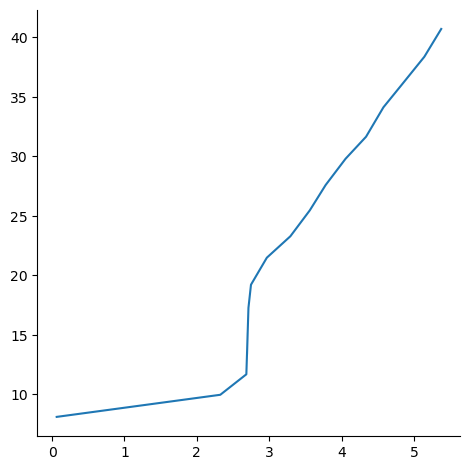

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

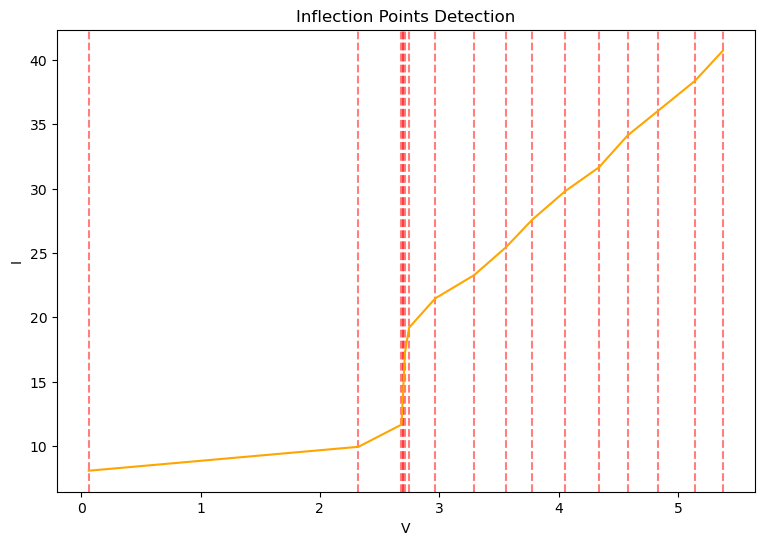

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

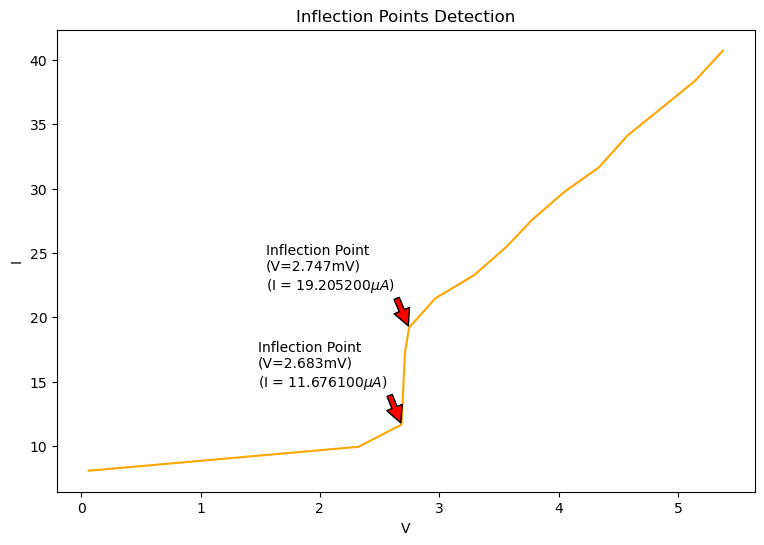

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [2, 6]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[-7.866, -7.527, -7.146, -6.821, -6.496, -6.186, -5.882, -5.571, -5.232, -4.929, -4.639, -4.357, -4.103, -3.848, -3.538, -3.298, -3.001, -2.662, -2.648, -2.613, -2.592, -2.577, -2.563, -2.549, -2.549, -2.521, -2.479, 0.064, 0.049, 0.064, 0.057, 0.064, 0.064, 2.323, 2.683, 2.697, 2.697, 2.712, 2.747, 2.966, 3.291, 3.559, 3.778, 4.053, 4.336, 4.576, 4.83, 5.141, 5.374, 5.663, 5.953, 6.256, 6.518, 6.871, 7.153, 7.471, 7.76, 8.099, 8.071, 7.873, 7.676, 7.471, 7.308, 7.083, 6.913, 6.715, 6.532, 6.341, 6.15, 5.981, 5.783, 5.621, 5.444, 5.282, 5.127, 4.943, 4.781, 4.597, 4.463, 4.265, 4.124, 3.983, 3.799, 3.658, 3.474, 3.347, 3.135, 2.853, 2.81, 2.796, 2.796, 2.768, 2.775, 2.74, 2.754, 2.74, 2.726, 2.726, 2.712, 2.726, 2.719, 2.697, 2.669, 2.57, 0.106, 0.12, 0.113, 0.127, 0.099, 0.113, 0.113, 0.127, 0.099, -0.254, -2.521, -2.514, -2.507, -2.535, -2.535, -2.563, -2.549, -2.577, -2.606, -2.916, -3.093, -3.248, -3.397, -3.566, -3.721, -3.919, -4.067, -4.258, -4.413, -4.625, -4.781, -4.936, -5.13

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

#Function for detecting the first occurrence of an item in a list
def find_first_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            first_occurrence = i
            break
    return first_occurrence

low_limit = find_first_occurrence(2.747, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0].max()) 

print(low_limit) 
print(up_limit)

38
57


In [12]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.747 2.966 3.291 3.559 3.778 4.053 4.336 4.576 4.83  5.141 5.374 5.663
 5.953 6.256 6.518 6.871 7.153 7.471 7.76 ]
[19.2052 21.4762 23.2764 25.4519 27.5837 29.7885 31.6399 34.1141 36.0174
 38.36   40.6964 43.1638 45.1974 47.6123 50.0695 52.397  54.8631 57.5324
 59.8682]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.008734))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 19
    # variables        = 2
    chi-square         = 17.0171325
    reduced chi-square = 1.00100779
    Akaike info crit   = 1.90585133
    Bayesian info crit = 3.79472928
    R-squared          = 1.00000000
[[Variables]]
    slope:      8097.87022 +/- 48.6644971 (0.60%) (init = 8119.854)
    intercept: -3046849.77 +/- 213867.712 (7.02%) (init = -3149249)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9519


## Plot the model

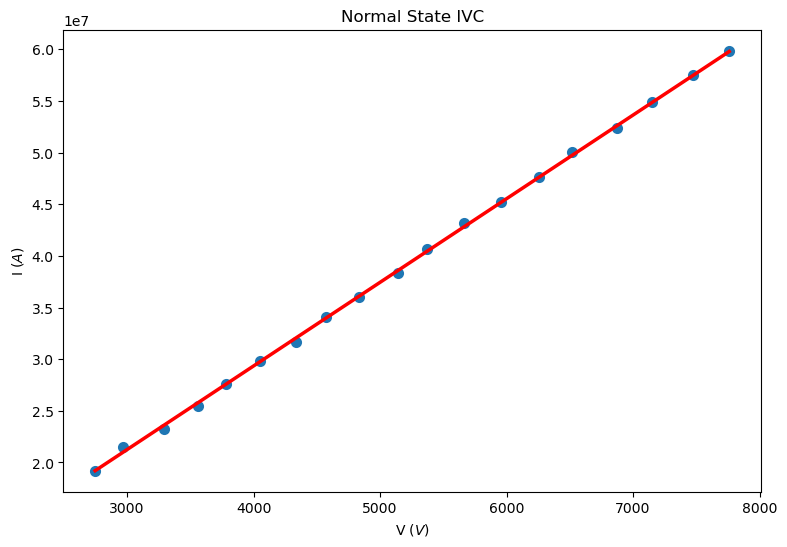

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 8097.870222829204, 'intercept': -3046849.7690237192}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000123 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 5.65115503 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 5.65115503 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.445116687352232e-22 J
Gap Energy = 4.890233374704464e-22 J
Gap Voltage = 3.0521990854477994 mV
Josephson Current = 17.791746490473457 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.056185113301933e-22 J
Gap Energy =  4.112370226603866e-22 J
Gap Voltage = 2.56670217613523 mV
Josephson Current = 14.14007920413296 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[6], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[2], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 19.2052, 'Ic_weak': 17.7917, 'Ic_strong': 14.1401, 'V_gap': 2.683, 'Vg_weak': 3.0522, 'Vg_strong': 2.5667, 'Temp': 5.6512}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>